In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
fig = plt.figure(figsize=(18,6), dpi=1600) 

In [2]:
data_raw = pd.read_csv("train.csv")

In [3]:
data_raw.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0


In [4]:
data_raw.shape

(26496, 8)

In [5]:
data_raw.describe()

,ID,temperature,var1,pressure,windspeed,electricity_consumption
count,26496.000000,26496.000000,26496.000000,26496.000000,26496.000000,26496.000000
mean,17455.500000,5.098989,-1.916233,986.450615,23.959956,298.359601
std,10122.873673,8.682860,10.424860,12.002647,48.280321,108.020555
min,0.000000,-17.100000,-32.900000,953.000000,1.075000,174.000000
25%,8717.750000,-2.900000,-10.700000,978.000000,3.155000,219.000000
50%,17435.500000,6.400000,-1.400000,986.000000,6.545000,267.000000
75%,26177.250000,12.100000,7.900000,995.000000,22.260000,342.000000
max,34895.000000,23.600000,18.600000,1024.000000,586.600000,1386.000000


Seems like there are no missing values  
There are some extreme values in electricity consumption, windspeed, potentially var1, and temperature. We can see that by the discrepancy in the 75% tile and the max.  
We should consider some sort of capping for these and potentiall all variables  
** TODO: Capping ** 

### Let's begin some plotting 

In [6]:
def make_plots(df):
    
    # Make sure df has columns we wish to plot 
    cols_to_plot = ['ID', 'datetime', 'temperature', 'var1', 'pressure', 'windspeed',
    'electricity_consumption']
    not_in_list = [item for item in cols_to_plot if item not in list(data_raw.columns)]
    if len(not_in_list) > 1:
        print(not_in_list, " is not in dataframe columns. Not trying to plot... ")
        return(1)
    
    
    # Time series of all the variables 
    plt.subplot2grid((3,2),(0,0))
    df.temperature.plot( )
    plt.title("Temperature")

    plt.subplot2grid((3,2),(0,1))
    df.var1.plot( )
    plt.title("Var1")

    plt.subplot2grid((3,2),(1,0))
    df.pressure.plot( )
    plt.title("Pressure")

    plt.subplot2grid((3,2),(1,1))
    df.windspeed.plot( )
    plt.title("WindSpeed")

    #plt.subplot2grid((3,3),(1,1))
    #df.var2.plot( )
    #plt.title("Var2")

    plt.subplot2grid((3,2),(2,0), colspan = 2)
    df.electricity_consumption.plot( )
    plt.title("Electricity Consumption (target)")
    
    return(0)


0

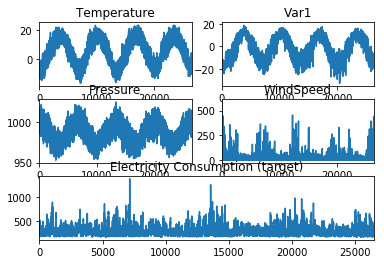

In [7]:
make_plots(data_raw)

Text(0.5,1,'Electricity Consumption (target)')

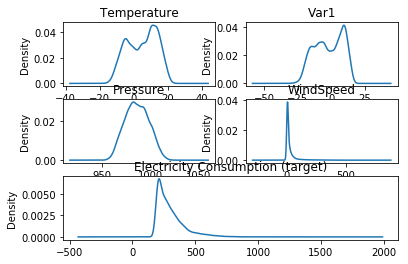

In [8]:
# Distribution of all the variables 
plt.subplot2grid((3,2),(0,0))
data_raw.temperature.plot(kind = 'kde')
plt.title("Temperature")

plt.subplot2grid((3,2),(0,1))
data_raw.var1.plot(kind = 'kde')
plt.title("Var1")

plt.subplot2grid((3,2),(1,0))
data_raw.pressure.plot(kind = 'kde')
plt.title("Pressure")

plt.subplot2grid((3,2),(1,1))
data_raw.windspeed.plot(kind = 'kde')
plt.title("WindSpeed")

#plt.subplot2grid((3,3),(1,1))
#data_raw.var2.plot(kind = 'kde')
#plt.title("Var2")

plt.subplot2grid((3,2),(2,0), colspan = 2)
data_raw.electricity_consumption.plot(kind = 'kde')
plt.title("Electricity Consumption (target)")



In [9]:
data_raw.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0


We notice that the data is hourly (as the description mentioned) and maybe we should aggregate to another level  
Let's also look at the end 

In [10]:
data_raw.tail()

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
26491,34891,2017-06-23 19:00:00,-0.7,-15.0,1009.0,51.685,A,225.0
26492,34892,2017-06-23 20:00:00,-2.9,-11.4,1005.0,56.105,A,213.0
26493,34893,2017-06-23 21:00:00,-1.4,-12.9,995.0,61.275,A,213.0
26494,34894,2017-06-23 22:00:00,-2.9,-11.4,996.0,67.210,A,210.0
26495,34895,2017-06-23 23:00:00,-2.1,-11.4,1009.0,71.880,A,210.0


## Begin Time Aggregations 

In [11]:
data_raw.index = pd.to_datetime(data_raw.datetime)

In [12]:
data_agg_prep = data_raw.drop(["var2", "datetime"], axis =1)

In [13]:
data_agg_prep.dtypes

ID                           int64
temperature                float64
var1                       float64
pressure                   float64
windspeed                  float64
electricity_consumption    float64
dtype: object

In [14]:
# Perform aggregations by the day 
monthly_data_gb = data_agg_prep.groupby(pd.Grouper(freq = 'M'))

In [15]:
mean_monthly = monthly_data_gb.apply(np.mean)
mean_monthly.head()

,ID,temperature,var1,pressure,windspeed,electricity_consumption
datetime,,,,,,
2013-07-31,275.5,-8.021377,-17.582609,1001.355072,87.168306,240.217391
2013-08-31,1019.5,-4.794203,-10.662681,993.492754,16.071277,386.635870
2013-09-30,1763.5,0.894384,-12.194928,991.641304,48.516812,269.565217
2013-10-31,2483.5,6.736051,-5.390036,984.865942,28.547572,294.461957
2013-11-30,3227.5,10.315761,-0.088043,978.329710,47.665707,265.326087


In [16]:
mean_monthly.describe()

,ID,temperature,var1,pressure,windspeed,electricity_consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,17455.500000,5.098989,-1.916233,986.450615,23.959956,298.359601
std,10228.536402,8.066797,9.552880,9.273818,16.238679,32.424933
min,275.500000,-8.243297,-17.582609,971.958333,8.628560,240.217391
25%,8855.500000,-2.071060,-11.637681,977.937047,13.109703,272.297554
50%,17435.500000,6.188496,-1.841214,986.491848,17.824339,296.269022
75%,26039.500000,11.869746,7.485734,993.820199,28.811927,311.940217
max,34619.500000,16.331159,12.368841,1001.355072,87.168306,386.635870


** Some observations ** 

We see that there are 48 observations which corresponds to 4 years (4 years * 12 months/ year) so we have confidence that the group by was sucessful.  

We also see that the quantiles are closer together and they do not differ as much from the 25% and 75% quantiles 

0

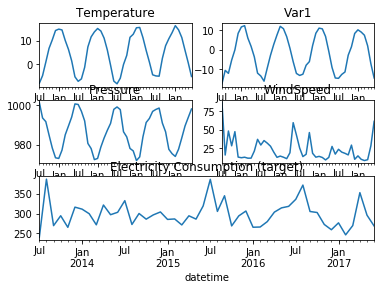

In [17]:
make_plots(mean_monthly)

Here we can see the cyclical patterns in the temperature and in variable 1.  
It is a little difficult to see in this plot but it looks like the peaks of the plots are **italics this later ** roughly
over the new year. This makes sense if it is the new year is warmer and the wind is higher at those points.

We can also notice that the electricity consumption and wind speed are not cyclical and will hopefully provide more information together.

### Let's look at the Standard Deviation Per Month (Per category) 

In [18]:
stdev_monthly = monthly_data_gb.apply(np.std)


0

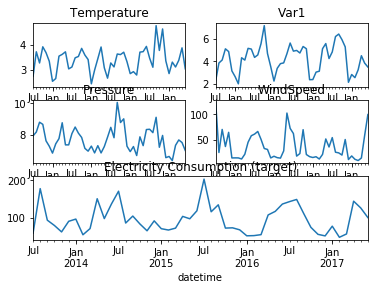

In [19]:
make_plots(stdev_monthly)

** Make plots with dots not lines **  
We are looking at how much the each variable varies within each month 
Of the 23 points each month, we calculate the standard deviation 

We see that the temperature and var1 have fairly consistent standard deviation. 
Temperature has a lower standard deviation than var1 but it seems pretty similar. 

### One more aggregation 

Min max Ratio 

In [30]:
mmr_monthly = monthly_data_gb.apply(lambda x: np.min(x)/np.max(x))
mmr_monthly.head()


,ID,temperature,var1,pressure,windspeed,electricity_consumption
datetime,,,,,,
2013-07-31,0.000000,21.428571,2.271028,0.961802,0.001833,0.346821
2013-08-31,0.574517,-2.385965,7.137931,0.958621,0.007988,0.197324
2013-09-30,0.729769,-0.598131,6.138889,0.958457,0.003354,0.258772
2013-10-31,0.800290,-0.193548,-4.162791,0.954320,0.005339,0.329545
2013-11-30,0.842706,0.072539,-1.131579,0.961809,0.003513,0.345029


0

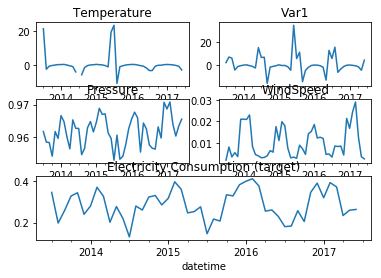

In [31]:
make_plots(mmr_monthly)

### More aggregations and potential Features 

* min max ratio
* monthly average 
* weekly velocity 
* Season as a factor 



### Let's try Weekly Aggregations 

In [37]:
weekly  = data_agg_prep.groupby(pd.Grouper(freq= 'W'))

In [38]:
weekly_mean = weekly.mean()

In [39]:
weekly_mean.describe()

,ID,temperature,var1,pressure,windspeed,electricity_consumption
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,17372.665829,5.199059,-1.798154,986.417624,22.813634,299.458617
std,10162.238404,8.133011,9.871271,9.639123,21.640826,64.051937
min,83.500000,-10.577500,-20.708333,966.000000,3.771250,206.937500
25%,8531.500000,-1.759201,-10.882738,977.297619,9.992882,258.910714
50%,17327.500000,6.137500,-0.747500,986.614583,14.404851,288.303571
75%,26021.500000,12.904613,7.672917,994.232143,25.440930,321.843750
max,34835.500000,17.083333,14.409375,1005.937500,119.278667,630.850000


In [40]:
shft = mean_monthly.shift(periods=2)
# Remember to take out the electricity consumption first 

In [41]:
shft.head()

,ID,temperature,var1,pressure,windspeed,electricity_consumption
datetime,,,,,,
2013-07-31,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-31,NaN,NaN,NaN,NaN,NaN,NaN
2013-09-30,275.5,-8.021377,-17.582609,1001.355072,87.168306,240.217391
2013-10-31,1019.5,-4.794203,-10.662681,993.492754,16.071277,386.635870
2013-11-30,1763.5,0.894384,-12.194928,991.641304,48.516812,269.565217


In [43]:
daily_data = data_raw.groupby(pd.Grouper(freq = 'D'))
daily_mean = daily_data.apply(np.mean)


### TODOs 

* Plotting function -- check
* Aggregations ( mean sum)  
-- We don't really need to lag the data although this could be useful later on 
* Time delays (figure out how to do weekly aggregations) 
* Generalize the shifted dataset (combinations - deleted first few observations and keep the rest 
* use an algorithm to generate predictions 


### Interesting Thoughts 

* Variation per day/ week/ min-max ratio fluctuations 
* Look at users and see if you can identify which users have a larger electricity consumption 
* Create segmentation/ flag for different cutoffs 

### Quick peak at the other files 

In [165]:
test = pd.read_csv("test.csv")

In [166]:
test.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2
0,552,2013-07-24 00:00:00,-10.0,-16.4,1011.0,263.280,A
1,553,2013-07-24 01:00:00,-10.0,-20.7,1011.0,267.175,A
2,554,2013-07-24 02:00:00,-10.7,-17.1,1003.0,269.555,A
3,555,2013-07-24 03:00:00,-13.6,-20.7,1008.0,273.060,A
4,556,2013-07-24 04:00:00,-10.7,-17.1,1006.0,1.765,A


In [163]:
sub = pd.read_csv("sample_submission_q0Q3I1Z.csv")

In [164]:
sub.head()

,ID,electricity_consumption
